In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
import csv

_DATA_SET = "E:/AIUB/11th sem/Computer Vision/CIFAR"
_CATEGORIES = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

_TRAIN_LABELS = []
csv_file=os.path.join(_DATA_SET,"trainLabels.csv")

with open(csv_file,'r') as file:
    reader = csv.reader(file)
    for row in reader:
        _TRAIN_LABELS.append(row)
_TRAIN_LABELS.pop(0)
print(len(_TRAIN_LABELS))
print(_TRAIN_LABELS[0:10])

50000
[['1', 'frog'], ['2', 'truck'], ['3', 'truck'], ['4', 'deer'], ['5', 'automobile'], ['6', 'automobile'], ['7', 'bird'], ['8', 'horse'], ['9', 'ship'], ['10', 'cat']]


In [2]:
_TRAIN_IMGS=[]
IMG_SIZE = 100

path = os.path.join(_DATA_SET,"train")
for ele in tqdm(range(len(_TRAIN_LABELS))):
    categories = _TRAIN_LABELS[ele][1]
    img = _TRAIN_LABELS[ele][0]+".png"
    img_arr =cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
    img_resize = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
    _TRAIN_IMGS.append([img_resize,categories])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [03:25<00:00, 243.12it/s]


In [3]:
print(len(_TRAIN_IMGS))

50000


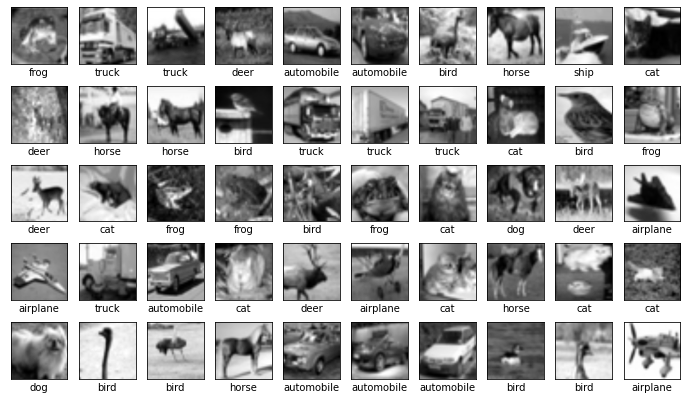

In [4]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(_TRAIN_IMGS[i][0],cmap=plt.cm.gray)
    plt.xlabel(_TRAIN_IMGS[i][1])


In [5]:
F1 = _TRAIN_IMGS[0:10000]
F2 = _TRAIN_IMGS[10000:20000]
F3 = _TRAIN_IMGS[20000:30000]
F4 = _TRAIN_IMGS[30000:40000]
F5 = _TRAIN_IMGS[40000:50000]
print(len(F1),len(F2),len(F3),len(F4), len(F5))


10000 10000 10000 10000 10000


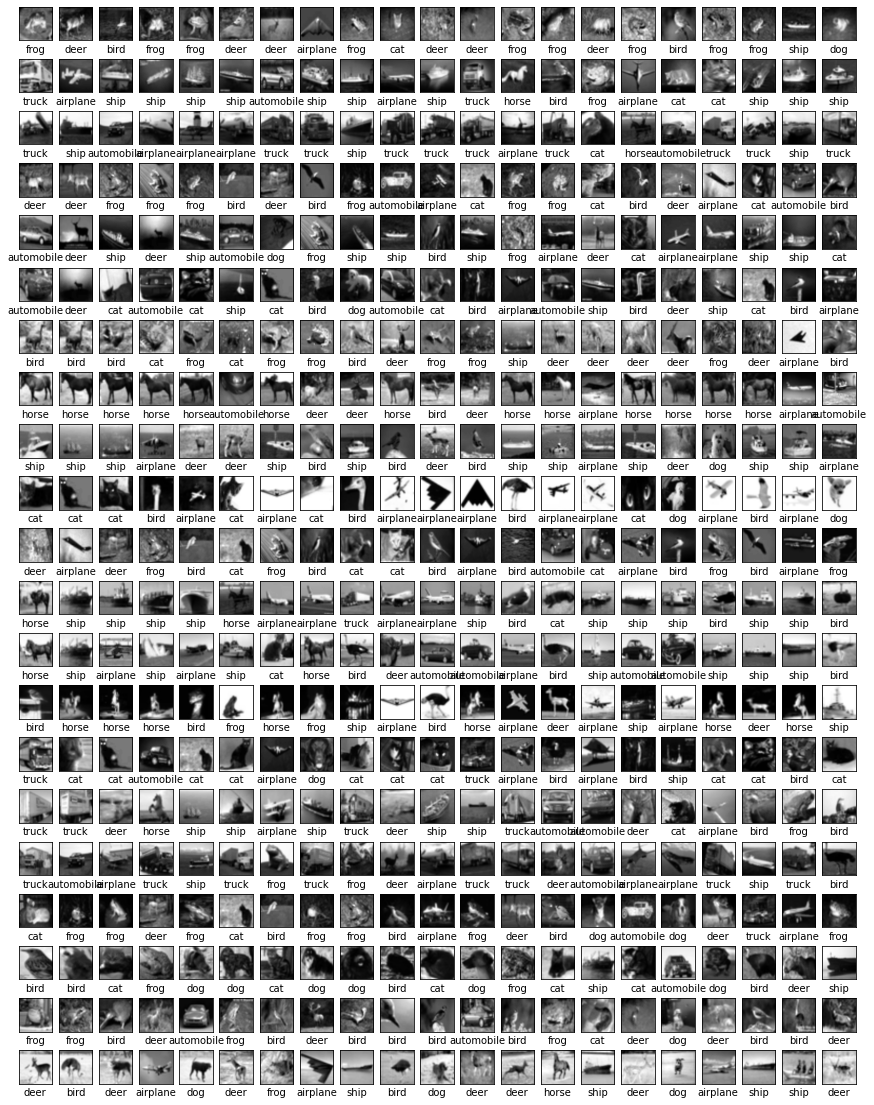

In [6]:
FT = F2+F3+F4+F5
plt.figure(figsize=(15,20))
tIndex = 1
for i in range(21):
    #print(i)
    p=0
    plt.subplot(21,21,tIndex+p)
    plt.imshow(F1[i][0],cmap=plt.cm.gray)
    plt.xlabel(F1[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr = []
    #arr2 =[]
    for j,k in enumerate(FT):
        dist_arr = np.abs(F1[i][0]-FT[j][0])
        dist = np.sum(dist_arr)
        arr.append([dist,FT[j][0],FT[j][1]])
        #arr2.append(arr[j][0])
    #min_index = np.argmin(arr2)
    arr.sort(key=lambda e:e[0])
    #''''
    l = 0
    for ii in range(20):
        #tIndex+=1
        p+=1
        plt.subplot(21,21,tIndex+p)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(arr[l][1],cmap=plt.cm.gray)
        plt.xlabel(arr[l][2])
        l+=1
    tIndex+=21
plt.show()